# Data Science Challenge
#### Edward Fry
#### 4/13/2021
#### Phishing Attacks
#### Microsoft Data & AI
#### Joao Pedro Martins, Proctor
---

# Abstract
XYZ Corporation is a credit card company. They are having difficulty controlling their fraud 
detection and recovery costs, especially through phishing attacks. It is important that XYZ understand 
first, who is likely to be attacked and why, and second, activities they can engage in to start decreasing 
the volume of attacks they receive.

They have collected data on their on their email phishing attacks that they have found so far and 
would like to use this dataset to predict which employees are being targeted and why. The dataset 
contains records for email users stretching back for one year.

The dataset has been obfuscated to prevent any leak of IP or identities from our analysis, and 
thus the column variables will be general in nature. The columns included were what the IT leads could 
put together is such short notice, but they are trying to get more data in the coming months. The 
business leaders of XYZ company would like to understand causality if at all possible, especially to 
understand which variables they should be looking at and if there are any more that would be 
worthwhile to try to get for future attempts. 

The variable that XYZ would like you to try to build a model around is labeled 
“EmployeeTargetedOverPastYear”. 
### Auto ML
Please do NOT use any form of AutoML for your models

### Explainability
Please prepare to explain local feature effects for every observation of the dataset.

### Deployment
Please deploy your models and be ready to demonstrate a live online REST API call to those models.


# Introduction
With the significant amount of data that the businesss needs to analyze, it is infeasible for humans to sift through it in order to determine how to best identify phishing attacks.  Thus, this study aims to identify a model (or models) that can be used to accurately identify attack candidates as new data comes in.  Phishing attacks expose XYZ to risk and potentially high reactive costs, including expenses for legal activity, brand reputation, and regulatory consequences.  As such, it is important to minimize the volume of attacks.  One promising approach is to predict which employees may be targeted.  Additionally, if reasons can be pinpointed as to why certain employees are targeted, then more holistic remedies can be implemented proactively.

In this study, data is first normalized, cleaned-up, and imputed.  Then, an exhaustive search of possible parameter combinations for each of 11 candidate models is undertaken.  Keeping the prediction goal in mind, a scoring function is chosen to minimize the cost by maximizing the true values chosen by the model.  Specifically, 4 classification states are possible: True and false positives and negatives. True positives and true negatives represent accurate identification, so these are desirable.  False positives are less desirable; however, the consequences of a false positive are that an employee perhaps takes unnecessary security precations, which is not very impactful.  The consquences of a false negative, however, would mean that a likely target ends up not taking additional precautions, plus systemic remedies might also be missed.  Therefore, it would be useful to weight false negatives more highly than false positives.  

Once results are computed, then, those results are compared to identify the lowest cost and other metrics of interest.  Finally, promising models are discussed and recommmended to the business along with specific steps to address the most common reasons for being targeted.

# Methods
### Data cleanup
As with any data set, it's important to make sure that the data is clean, normalized, and as complete as possible.  The incoming dataset was about 160k rows of information.  Some fields had extra characters like dollar or percent signs that might throw off the types when doing calculations, so those had to be removed.  Three categorical variables were identified, and those were all converted to lowercase for standardization.  A short function to display any missing values revealed that there were, in fact, a few missing values throughout the dataset for every variable.  Very few values were missing relative to the total size of the dataset that only performing a visual inspection of the data would have probably led one to conclude that there were no missing values, so having the computer perform the check is important.

Once missing values are identified, an appropriate imputation strategy for each variable is determined.  Some variables, especially categoricals, are best imputed by looking at the mode.  Some need the median to protect against outliers, and the remainder can use the mean.  To determine the distribution, each variable's histogram was plotted and examined.  They all followed a normal distribution, with one possible exception that seemed to have an outlier - that exception was imputed with the median as described.

As a final check, once all imputation is complete, the program again checks each variable for missing values.  This time, nothing is displayed, so the data is ready for modeling.

### Grid Search
Because it is so important to get the model right in order to save the maximum amount of money, a variety of potential classifers were chosen for examination.  For each model, various combinations of parameters were used to fit models on a set of training data.  A hold-out test set was then used to compute the relative performance of each set of parameters by model.  The collection of tested parameters is called a "grid" since the parameters could be listed in a tabular or grid-like format.  Because each combintation is fit in turn, the technique is a "grid search".  The grid search results in a thorough study of possible models and parameters with minimal preconceptions about which ones might ultimately be the best.  While a random grid search, in which only a portion of possible parameters in the grid are chosen at random for evaluation, was an option, it seemed that an exhaustive grid search that tried every single combination would be better in this situation since the business stands to lose so much money on false results.

Part of the grid search process is cross-validation to guard against overfitting.  It works by holding out a 1/n potion of the training data, then using the heldout data for validation.  Then, the next portion is held out until all n portions have been held out and used for validation.  Originally, a 10-fold cross validation scheme was attempted; however, for the number of models and parameter grids under examination, 10-fold cross validation simply took too long to compute.  Thus, this was reduced to 5-fold cross validation.  This is still an adequate amount according to the literature and equates to 20% of the data being held out for validation on each pass.

### Scoring
All models need a way to determine the relative effectiveness of the model, and the models under grid search are no exception.  In fact, choosing a scoring model was very important to this particular problem.  Because we want to optimize to minmimize losses and specifically to minimize false positives and false negatives, this is accounted for in the scoring model.  Minimizing the number of false positives could also be considered maximizing the precision, which denotes the relative number of true positives.  Similarly, minimizing the number of false negatives is equivalent to maximizing recall.  There is a commonly used scoring metric called F1, which is the harmonic mean of precision and recall.  That seems promising all by itself, but the next step is to assign appropriate weighting.  For this exercise, let's assume that false negatives are 5 times worse than false positives due to the much more serious repercussions of a false negative.  Fortunately, there is a weighted variant of the F1 score known as f-beta, where beta is the relative weight to use.  Thus, for the main scorer, f-beta is maximized to meet XYZ's requirements.

### Models
Eleven models were examined for this problem, each one with its own set of parameters.  Tree-based classifiers included decisions trees and random forests, and they were fit with gini and entropy criterion, 200 estimators (which is twice the new scikit default of 100), bootstrap and oob both on and off, various leaf configurations, and square root and log maximum features.

A ridge classifer examined 6 solvers for a range of alpha between 0 and 1.  Logistic regression tried 5 solvers with each of l1, l2, elastic net, or no penalty, an exponential set of C values, and an l1 ratio between 0 and 1.  A passive aggressive classifer used a similar range of C values.  Support vector machines can provide accurate predictions; however, they are computationally expensive.  For 160,000 rows of data, a linear SVM is used in its place with an exponential range of C, hinge and squared hinge losses, and l1 and l2 penalties.  AdaBoost simply varied the learning rate between .01 and .5.  Stochastic gradient descent followed a similar scheme to logistic regression.

Finally, three more exotic models were fit.  LightGBM was fit on each of 4 boosting methods with depths between 2 and 10 and learning rates between .05 and .1.  XGBoost ranged the same depths and learning rate while varying the number of estimators between 60 and 220.  And a multilayer perceptron (neural network) combined 4 activations, 3 common solvers, and 3 learning rates with 5 exponentially increasing alphas.

### Computational Considerations
As noted above, the cross validation rate was reduced to 5 from 10 in order to speed up calculations.  In addition, each model examined in the grid search needed to be temporarily pulled into its own small Python code file that contained the logic for that one model along with some logic to save the results in a pickle file.  This let the project leverage parallel computation.  Later, the saved results of each grid search were read back into the main application and further examined for the final solution to the problem.


# Results
### Lowest cost
The lowest cost model turned out to be the multilayer perceptron with an estimated cost of \\$131,600.  Cost was calculated using the formula 25 * false positive + 125 * false negative.  For completeness, the exact counts of true and false positives and negatives is available.

![Figure 1](EstCost.png)
<center>Figure 1: Costs by model</center>

### Top models
The top 4 models turned out to be the multilayer perceptron, XGBoost, random forest, and LightGBM.  All four models not only maximized the f-beta score, but they also topped the accuracy, precision and recall leaderboards.  In addition and as the ultimate measurement of success on this project, they also minimized the dollar loss for false predictions as specified in the requirements from the business owner.

#### <center>Model performance by cost</center>

![Table 1](ModelPerfTableAll.png)
<center>Table 1: Performance by model</center>

The other 7 models were considerably lower performers by all of the same measures, and AdaBoost ended up being the worst performer of all.  This is perhaps because Ada had a limited number of parameters in its grid search as compared to the others.  It also isn't surprising that the multilayer perceptron performed so well since it is widely known that neural networks are very powerful, often out-performing their more traditional model peers.

The optimal parameters for the perceptron were logistic activation with an inverse scaling learning rate, alpha of 10, and the lbfgs solver.  The adam solver is popular lately in the literature, so it is interesting that lbfgs was better in this case and another good reason not to pre-suppose which parameters might be best when determining the parameters of interest for the grid search.

For XGBoost and LightGBM, the best parameters were similar.  Both had a learning rate of .1 and a maximum depth of 9.  This is likely because both of these are boosting algorithms and therefore similar to each other.

Finally, the last top performer, random forest, maximized its performance using bootstrapping, no maximum depth, 200 estimators, a maximum number of features calculated with the square root, and entropy criterion.  Gini criterion was expected since it has received a fair bit of positive coverage in recent courses; however, entropy was the winner, again proving that its best to start choosing models and parameters for tuning with an open mind.  The full list of optimal parameters is in Appendix A.

### Relative performance
In order to better visualize the relative performance of each model against its peers, the four key metrics of f-beta, accuracy, precision, and recall were plotted together.  This might be convenient if, for example, it was desired to look at another metric, like precision, and see at a glance if that might be a better solver than f-beta.  It also gives a good indication of how the models stratify in their performance.  For the most part, models tended to stay in their performance "lane" and not vary too much.  For instance, a moderate f-beta model would likely also have a moderate accuracy, precision, and recall.  There were exceptions to this, of course, but they were not too much outside expectations.  For instance, AdaBoost had a moderately high precision even though its other scores were all at the bottom of the group.  However, the top 4 models dominated all of their categories, and there is clear white space between those 4 and the other 7 below them.

![Figure 2](ScoreComparisons.png)
<center>Figure 2: Relative model performance</center>

# Conclusion
This model study sought to identify that model that would produce the lowest cost for the business.  False positives lose 25 dollars, and false negatives lose 125.  After cleaning and normalizing the data, an exhaustive grid search was executed on 11 candidate models.  The best model was the multilayer peceptron, or neural network.  It had the smallest lost value of 161k and also the best f-beta and accuracy scores.  XGBoost, LightGBM, and random forest were also quite good.  The remaining 7 models were average to poor and are not recommended.

Thoughts for additional research might include using a tool like Tensorflow to try a variety of neural networks to see if that best model can be improved with a different configuration.  In addition, an ensemble method combining the top models from this study might provide a small improvement over using them separately.  However, with scores well in the 90s, the models identified here are certainly strong enough to go to market right away.

# Appendix A: Best Model Parameters


Ada Boost

	 learning_rate : 0.5

	 n_estimators : 100

Decision Tree

	 class_weight : balanced

	 criterion : gini

	 max_depth : 10

	 max_features : sqrt

	 splitter : best

Gradient Boosted Decision Trees (LGBM)

	 boosting : goss

	 learning_rate : 0.1

	 max_depth : 9

Support Vector Machine

	 C : 0.1

	 class_weight : balanced

	 fit_intercept : False

	 loss : hinge

	 penalty : l2

Logistic Regression

	 C : 10

	 fit_intercept : False

	 l1_ratio : 0.0

	 penalty : l2

	 solver : lbfgs

Multilayer Perceptron

	 activation : logistic

	 alpha : 10

	 early_stopping : True

	 learning_rate : invscaling

	 solver : lbfgs

Passive Aggressive

	 C : 0.001

	 early_stopping : True

	 fit_intercept : False

Random Forest

	 bootstrap : True

	 criterion : entropy

	 max_depth : None

	 max_features : sqrt

	 max_leaf_nodes : None

	 n_estimators : 200

	 oob_score : False

Ridge Regression

	 alpha : 0.5

	 fit_intercept : False

	 solver : auto

Stochastic Gradient Descent

	 alpha : 1e-05

	 fit_intercept : False

	 l1_ratio : 0.8

	 penalty : elasticnet

Extreme Gradient Boosting (XGB)

	 learning_rate : 0.1

	 max_depth : 9

	 n_estimators : 180
     
# Appendix B: Code and Output

In [11]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sklearn, re
import plotly.graph_objects as go
import seaborn as sb
from operator import attrgetter
from collections import Counter

from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.base import BaseEstimator, ClassifierMixin

from sklearn import linear_model as lm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier

%matplotlib inline

# Load data
wd = r"C:\Code\EdwardFryDataScienceChallenge"
dataSourceFilename = r"EdwardFry_Microsoft_issueDataset.csv"
os.chdir(wd)
df = pd.read_csv(dataSourceFilename)
df.head()

,Activity on Company Forums,City,Email Domain,EmployeeTargetedOverPastYear,Gender (code),Manager Rating of Likelihood to Leave Company,NS100Training Completed,Social Media Activity (Scaled),"Survey, Employee Satisfaction (Scaled)",behaviorPattern3,...,fraudTraining Completed,peerUsageMetric2,peerUsageMetric3,peerUsageMetric4,peerUsageMetric5,phishingTraining Completed,redTeamEval,usageMetric1,usageMetric4,usageMetric5
0,12.0,Kachkanar,si.edu,0.0,1,1.0,1,3,1,0,...,0,6,1,0,4,0,4.0,4.0,8,NaN
1,28.0,Kista,earthlink.net,1.0,1,1.0,1,0,4,1,...,0,0,0,4,0,1,27.0,0.0,4,0.0
2,16.0,Belleville,sciencedaily.com,1.0,1,1.0,1,6,5,0,...,1,2,1,1,2,0,10.0,5.0,8,0.0
3,30.0,Chwałowice,tripadvisor.com,0.0,1,1.0,1,0,2,1,...,0,2,0,0,2,0,15.0,3.0,8,0.0
4,6.0,Kachkanar,redcross.org,1.0,1,1.0,0,3,4,0,...,0,1,1,0,4,1,13.0,3.0,8,2.0


In [12]:
# Normalize and examine column names; refer to cols by name in case future datasets are in a different order
col_names = list(df.columns)
print(col_names)

['Activity on Company Forums', 'City', 'Email Domain', 'EmployeeTargetedOverPastYear', 'Gender (code)', 'Manager Rating of Likelihood to Leave Company', 'NS100Training Completed', 'Social Media Activity (Scaled)', 'Survey, Employee Satisfaction (Scaled)', 'behaviorPattern3', 'behaviorPattern5', 'datumThreatMonitoringScore', 'fraudTraining Completed', 'peerUsageMetric2', 'peerUsageMetric3', 'peerUsageMetric4', 'peerUsageMetric5', 'phishingTraining Completed', 'redTeamEval', 'usageMetric1', 'usageMetric4', 'usageMetric5']


In [13]:
# Init each index in case a future column is missing
col_forums = -1
col_city = -1
col_email = -1
col_employee_target = -1
col_gender = -1
col_leave = -1    
col_ns100 = -1
col_social = -1
col_sat = -1
col_behavior3 = -1
col_behavior5 = -1
col_threat = -1
col_fraud = -1
col_peer2 = -1
col_peer3 = -1
col_peer4 = -1
col_peer5 = -1
col_phish = -1
col_redteam = -1
col_usage1 = -1
col_usage4 = -1
col_usage5 = -1

In [14]:
# Name each index so column can be referred to by name regardless of input ordering
# Use matching to identify columns in case ordering or name strings are confounded
for name in col_names:
    name_lower = name.lower()
    if re.search(r"forums", name_lower):
        col_forums = col_names.index(name)
    elif re.search(r"city", name_lower):
        col_city = col_names.index(name)        
    elif re.search(r"email", name_lower):
        col_email = col_names.index(name)
    elif re.search(r"employee.*target", name_lower):
        col_employee_target = col_names.index(name)        
    elif re.search(r"(gender|sex)", name_lower):
        col_gender = col_names.index(name)        
    elif re.search(r"like.*leave", name_lower):
        col_leave = col_names.index(name)        
    elif re.search(r"ns100", name_lower):
        col_ns100 = col_names.index(name)        
    elif re.search(r"social.*media", name_lower):
        col_social = col_names.index(name)        
    elif re.search(r"satisfaction", name_lower):
        col_sat = col_names.index(name)        
    elif re.search(r"behavior.*3", name_lower):
        col_behavior3 = col_names.index(name)        
    elif re.search(r"behavior.*5", name_lower):
        col_behavior5 = col_names.index(name)        
    elif re.search(r"threat.*mon", name_lower):
        col_threat = col_names.index(name)        
    elif re.search(r"fraud.*training", name_lower):
        col_fraud = col_names.index(name)        
    elif re.search(r"peer.*2", name_lower):
        col_peer2 = col_names.index(name)        
    elif re.search(r"peer.*3", name_lower):
        col_peer3 = col_names.index(name)        
    elif re.search(r"peer.*4", name_lower):
        col_peer4 = col_names.index(name)         
    elif re.search(r"peer.*5", name_lower):
        col_peer5 = col_names.index(name)           
    elif re.search(r"ish.*training", name_lower):
        col_phish = col_names.index(name)           
    elif re.search(r"red.*team", name_lower):
        col_redteam = col_names.index(name)           
    elif re.search(r"^usage.*1", name_lower):
        col_usage1 = col_names.index(name)        
    elif re.search(r"^usage.*4", name_lower):
        col_usage4 = col_names.index(name)        
    elif re.search(r"^usage.*5", name_lower):
        col_usage5 = col_names.index(name)
        
all_col_indices = [col_forums, col_city, col_email, col_employee_target,
                   col_gender, col_leave, col_ns100, col_social, col_sat,
                   col_behavior3, col_behavior5, col_threat, col_fraud,
                   col_peer2, col_peer3, col_peer4, col_peer5, col_phish,
                   col_redteam, col_usage1, col_usage4, col_usage5]
print(all_col_indices)  # If all goes as planned, the output from the original training dataset should be a list of increasing integers

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [15]:
# Initialize containers
est_with_means = [col_redteam]
est_with_medians = [col_forums]  # Determined after looking at histogram plots for outliers (below)
est_with_modes = []  # Most categoricals will get this
est_excludes = [col_employee_target]
target = col_employee_target
categoricals = [col_city, col_email, col_employee_target,
                col_gender, col_leave, col_ns100, col_social, col_sat,
                col_behavior3, col_behavior5, col_threat, col_fraud,
                col_peer2, col_peer3, col_peer4, col_peer5, col_phish,
                col_usage1, col_usage4, col_usage5]

# Normalize categoricals
for i in categoricals:
    try:
        df[i] = df[i].str.lower()
    except:  # Ignore non-strings
        pass

In [16]:
# Functions
def show_missing(df): 
    print("Number of missing values by column:")
    for i in df.columns:
        if df.loc[df[i].isna(), i].shape[0] > 0:
            print("\t", i, df.loc[df[i].isna(), i].shape)

Shape:  (14000, 22)
Number of missing values by column:
	 Activity on Company Forums (282,)
	 Manager Rating of Likelihood to Leave Company (290,)
	 usageMetric1 (273,)
	 usageMetric5 (1278,)

Most commmonly used values and distribution by column:
	 0 [('Activity on Company Forums', 1)]


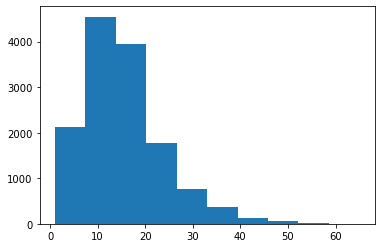

	 1 [('City', 1)]


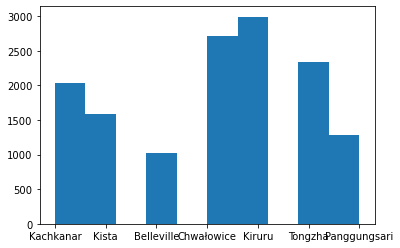

	 2 [('Email Domain', 1)]


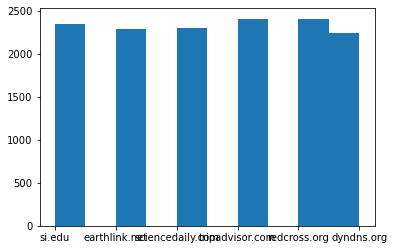

	 3 [('EmployeeTargetedOverPastYear', 1)]


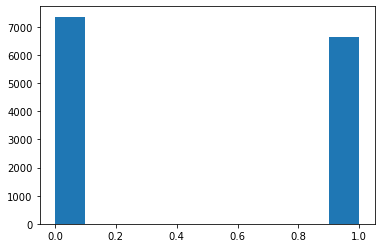

	 4 [('Gender (code)', 1)]


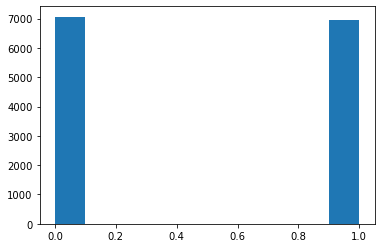

	 5 [('Manager Rating of Likelihood to Leave Company', 1)]


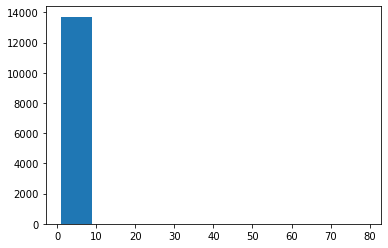

	 6 [('NS100Training Completed', 1)]


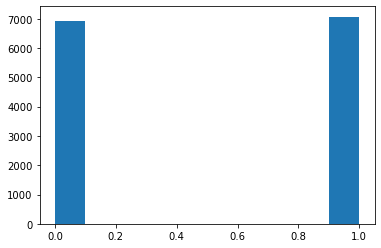

	 7 [('Social Media Activity (Scaled)', 1)]


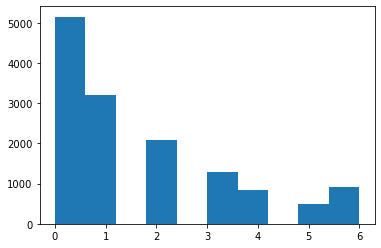

	 8 [('Survey, Employee Satisfaction (Scaled)', 1)]


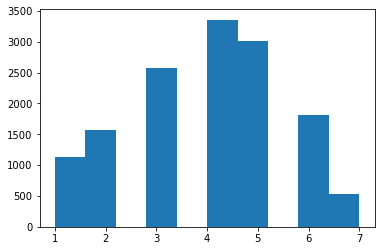

	 9 [('behaviorPattern3', 1)]


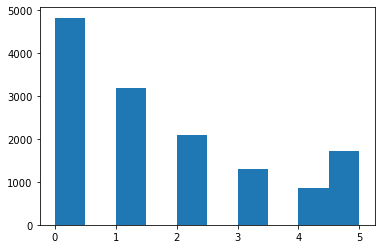

	 10 [('behaviorPattern5', 1)]


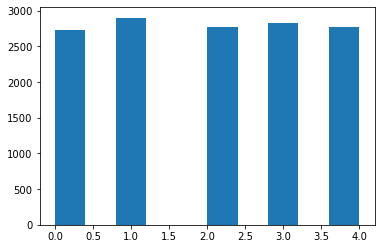

	 11 [('datumThreatMonitoringScore', 1)]


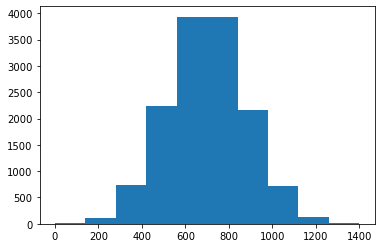

	 12 [('fraudTraining Completed', 1)]


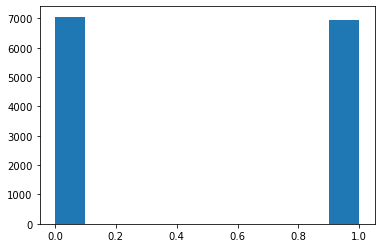

	 13 [('peerUsageMetric2', 1)]


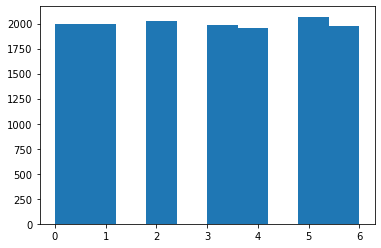

	 14 [('peerUsageMetric3', 1)]


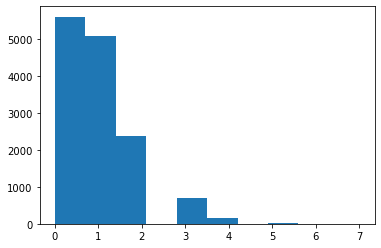

	 15 [('peerUsageMetric4', 1)]


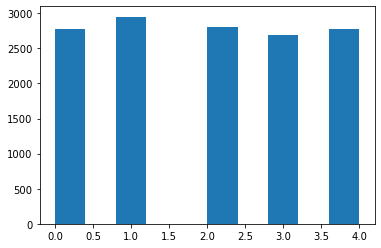

	 16 [('peerUsageMetric5', 1)]


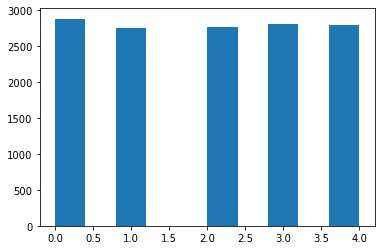

	 17 [('phishingTraining Completed', 1)]


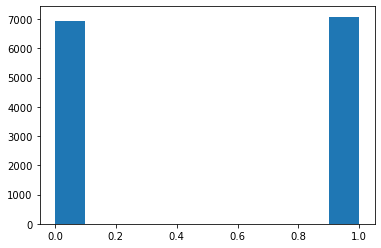

	 18 [('redTeamEval', 1)]


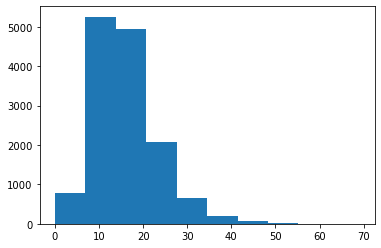

	 19 [('usageMetric1', 1)]


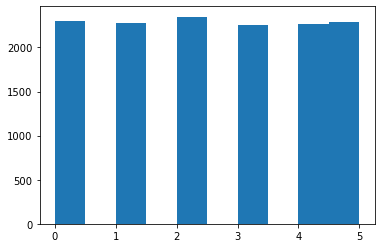

	 20 [('usageMetric4', 1)]


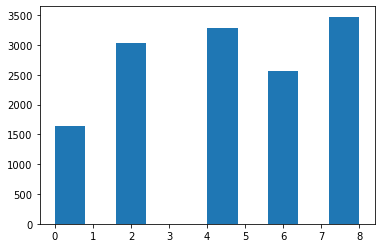

	 21 [('usageMetric5', 1)]


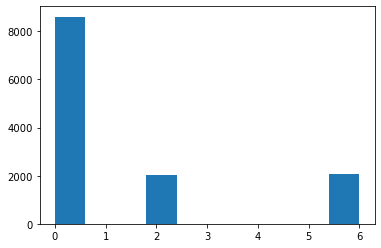


Categorical variables:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21]

Mean estimation variables:  [18]

Median estimation variables:  [0]

Mode estimation variables:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21]


In [17]:
# Examine data
print("Shape: ", df.shape)

# Study data topography to determine best way to fill in missing values and place in appropriate container
show_missing(df)
print("\nMost commmonly used values and distribution by column:")
for i in all_col_indices:
    if df.iloc[:, [i]].isna().shape[0] > 0:
        print("\t", i, Counter(df.iloc[:, [i]]).most_common(3))
        
        # Looking for outliers, if normal, can you mean, otherwise use median
        plt.hist(df.iloc[:, [i]])    
        plt.show()

        # Sort columns by the type of missing value estimation best for it to use
        if i in categoricals:
            est_with_modes.append(i)
        else:   # Anything not using median or mode will use mean
            if i not in categoricals + est_with_means + est_with_medians + est_with_modes + est_excludes:
                est_with_means.append(i)

print("\nCategorical variables: ", categoricals)
print("\nMean estimation variables: ", est_with_means)
print("\nMedian estimation variables: ", est_with_medians)
print("\nMode estimation variables: ", est_with_modes)

In [18]:
# Impute missing values
for i in est_with_medians:
    col_name = df.columns[i]
    df[col_name] = df[col_name].fillna(df[col_name].median())
    
for i in est_with_means:
    col_name = df.columns[i]
    df[col_name] = df[col_name].fillna(df[col_name].mean())
    
for i in est_with_modes:
    col_name = df.columns[i]
    df[col_name] = df[col_name].fillna(df[col_name].mode()[0])
    
show_missing(df)  # Should display nothing

Number of missing values by column:


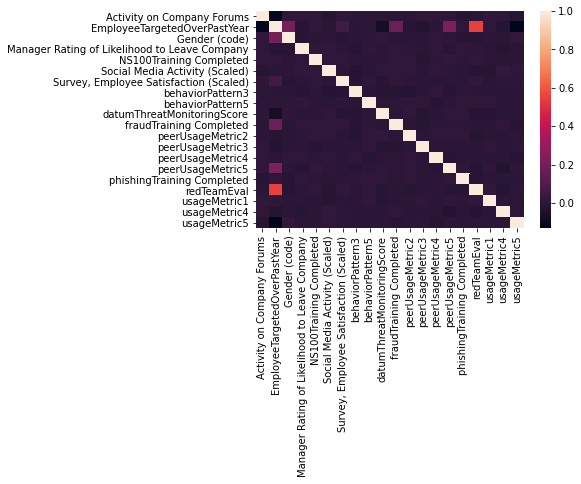

In [19]:
# Plotting correlation heatmap
xyz_corr = sb.heatmap(df.corr())
  
# Displaying heatmap
plt.show()

In [20]:
# Pre-train prep

# Identify correlated features
corr_features = [col_redteam, col_peer5, col_fraud, col_sat, col_gender]

# Split target from features and drop unused columns
drop_columnns = []
df = df.drop(drop_columnns, axis=1)

X = df.iloc[:, df.columns != target]  # All except target column
y = df.iloc[:, target]  # Target column

# One hot encode the categoricals
for column in categoricals:
    column_title = str(df.columns[column])
    ohe = pd.get_dummies(df[column_title], prefix=column_title)
    X = X.drop([column_title], axis=1)
    X = pd.concat([X, ohe], axis=1)  # Merge the continuous and one-hot frames together

# Standardize the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=14)
    
print(r"Working dataframe...")
print(X[:3])
print(y.head())

Working dataframe...
[[-0.39944777 -1.63092843 -0.28136172 ...  0.64487022 -0.41216968
  -0.41761001]
 [ 1.56107502  1.55670217 -0.28136172 ...  0.64487022 -0.41216968
  -0.41761001]
 [ 0.09068293 -0.79937262  3.55414373 ...  0.64487022 -0.41216968
  -0.41761001]]
0    0.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: EmployeeTargetedOverPastYear, dtype: float64


In [21]:
# Save data
import pickle

cleanDataFilename = r"clean_data.pkl"
os.chdir(wd)

cleanData = (X, y, X_train, X_test, y_train, y_test)

cleanDataFile = open(cleanDataFilename, 'wb')
pickle.dump(cleanData, cleanDataFile)
cleanDataFile.close()

In [22]:
# Load data
import pickle

cleanDataFilename = r"clean_data.pkl"
os.chdir(wd)

cleanDataFile = open(cleanDataFilename, 'rb')
cleanData = pickle.load(cleanDataFile)
cleanDataFile.close()

X, y, X_train, X_test, y_train, y_test = cleanData
print(X[:3])
print(y.head())

[[-0.39944777 -1.63092843 -0.28136172 ...  0.64487022 -0.41216968
  -0.41761001]
 [ 1.56107502  1.55670217 -0.28136172 ...  0.64487022 -0.41216968
  -0.41761001]
 [ 0.09068293 -0.79937262  3.55414373 ...  0.64487022 -0.41216968
  -0.41761001]]
0    0.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: EmployeeTargetedOverPastYear, dtype: float64


In [111]:
# The models and their parameter permutations to be examined
models = [
    { 
        "model" : [RandomForestClassifier()],
        "name" : "Random Forest",
        "params" : 
        {
            "n_estimators"        : [200],
            "max_features"        : ["sqrt", "log2"],
            "bootstrap"           : [False, True],
            "criterion"           : ['gini', 'entropy'],
            "oob_score"           : [True, False],
            "max_depth"           : [None, 6, 8, 10],
            "max_leaf_nodes"      : [None, 5, 10, 20],
            "min_impurity_split"  : [0.1, 0.2, 0.3]
        }
    },
    { 
        "model" : [lm.RidgeClassifier()],
        "name" : "Ridge Regression",
        "params" : 
        {
            "alpha"                : [0.1, 0.3, 0.5, 1.0],
            "fit_intercept"        : [False],  # Data should already be normalized
            "solver"               : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
        }
    },
    { 
        "model" : [lm.LogisticRegression()],
        "name" : "Logistic Regression",
        "params" : 
        {
            "penalty"              : ['l1', 'l2', 'elasticnet', 'none'],
            "C"                    : [0.001, 0.1, 1, 10, 100, 10e5],
            "fit_intercept"        : [False],  # Data should already be normalized
            "solver"               : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            "l1_ratio"             : [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
       }
    },
    { 
        "model" : [lm.PassiveAggressiveClassifier()],
        "name" : "Passive Aggressive",
        "params" : 
        {
            "fit_intercept"        : [False],  # Data should already be normalized
            "C"                    : [0.001, 0.1, 1, 10, 100, 10e5],
            "early_stopping"       : [True]
        }
    },
    { 
        "model" : [DecisionTreeClassifier()],
        "name" : "Decision Tree",
        "params" : 
        {
            "criterion"            : ['gini','entropy'],
            "splitter"             : ['best','random'],
            "class_weight"         : ['balanced', None],
            "max_depth"            : [None, 6, 8, 10],
            "max_features"         : ["sqrt", "log2"]
        }
    },
    { 
        "model" : [LinearSVC()],  # Regular SVC is not practical for this much data
        "name" : "Support Vector Machine",
        "params" : 
        {
            "C"                     : [0.001, 0.1, 1, 10, 100, 10e5],
            "class_weight"          : ['balanced'],
            "probability"           : [True],
            "penalty"               : ['l1', 'l2'],
            "loss"                  : ['hinge', 'squared_hinge'],
            "fit_intercept"         : [False] # Data should already be normalized
        }
    },
    { 
        "model" : [AdaBoostClassifier()],
        "name" : "Ada Boost",
        "params" : 
        {
            "n_estimators"          : [50, 100],
            "learning_rate"         : [0.01, 0.05, 0.1, 0.5]
        }
    },
    { 
        "model" : [lm.SGDClassifier()],
        "name" : "Stochastic Gradient Descent",
        "params" : 
        {
            "alpha"                 : [0.00001, 0.000001],
            "penalty"               : ['l1', 'l2', 'elasticnet'],
            "n_iter"                : [10, 50, 80],
            "l1_ratio"              : [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
            "fit_intercept"         : [False]  # Data should already be normalized
        }
    },
    { 
        "model" : [LGBMClassifier()],
        "name" : "Gradient Boosted Decision Trees (LGBM)",
        "params" : 
        {
            "boosting"               : ['gbdt', 'rf', 'dart', 'goss'],
            "max_depth"              : range (2, 10, 1),
            "learning_rate"          : [0.1, 0.01, 0.05]
        }
    },
    { 
        "model" : [XGBClassifier()],
        "name" : "Extreme Gradient Boosting (XGB)",
        "params" : 
        {
            "max_depth"              : range (2, 10, 1),
            "n_estimators"           : range(60, 220, 40),
            "learning_rate"          : [0.1, 0.01, 0.05]
        }
    },
    { 
        "model" : [MLPClassifier()],
        "name" : "Multilayer Perceptron",
        "params" : 
        {
            "alpha"                  : [0.001, 0.1, 1, 10, 100],
            "activation"             : ['identity', 'logistic', 'tanh', 'relu'],
            "solver"                 : ['lbfgs', 'sgd', 'adam'],
            "learning_rate"          : ['constant', 'invscaling', 'adaptive'],
            "early_stopping"         : [True] 
        }
    }]

In [112]:
# Grid search for optimal model and parameters


# Minimize false positive = maximize precision
# Minimize false negative = maximize recall
# F-beta is weighted harmonic mean of preicision and recall, so weight ratio recall:precision is 5:1
custom_scorer = make_scorer(fbeta_score, beta=5)

results=[]

for model in models:

    # Classifier
    clf = model['model'][0]
    print("Grid search on", model['name'])

    # Grid search many potential models and parameters to find optimal fit and save the boss some $$$
    grid = GridSearchCV(clf, param_grid=model['params'], scoring=custom_scorer, cv=5, n_jobs=-1, verbose=4)
    grid.fit(X_train, y_train.values.ravel())
    
    # Get metrics of interest for report
    y_pred = grid.predict(X_test)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    CM = confusion_matrix(y_test, y_pred)

    # Results for later comparison
    results.append(
        {
            'name'       : model['name'],
            'grid'       : grid,
            'classifier' : grid.best_estimator_,
            'best score' : grid.best_score_,
            'best params': grid.best_params_,
            'precision'  : pre,
            'recall'     : rec,
            'TN'         : CM[0][0],
            'FN'         : CM[1][0],
            'TP'         : CM[1][1],
            'FP'         : CM[0][1],
            'cv'         : grid.cv
        })

# Sort result by best score
results = sorted(results, key=lambda x: x['best score'],reverse=True)

Grid search on Random Forest
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:  5.2min


KeyboardInterrupt: 

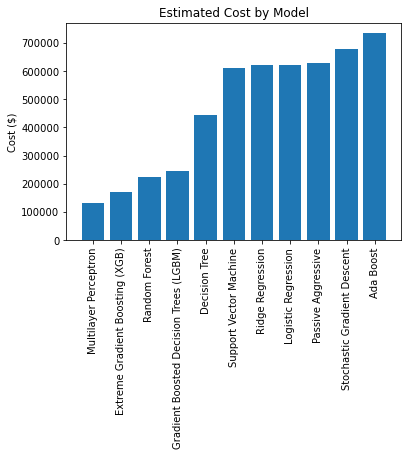

In [146]:
# Create a bar chart to illustrate the most important metric according to the business owner - cost

cost = []
xlabels = []
for result in results:
    FP = result['FP']
    FN = result['FN']
    TP = result['TP']
    TN = result['TN']
    score = result['best score']
    loss = (FP + 5*FN)
    cost.append((result['name'], loss))
    
# Plot the results neatly
cost.sort(key = lambda x: x[1])
xlabels = [x[0] for x in cost]
costvals = [x[1] for x in cost]

N = len(cost)
ind = np.arange(N)    # X locations for the groups

p = plt.bar(ind, costvals)

plt.ylabel('Loss')
plt.title('Estimated Loss by Model')
plt.xticks(ind, xlabels, rotation = 90)

plt.show()

In [ ]:
import glob, pickle

p =  r"C:\Code\EdwardFryDataScienceChallenge\Results"
os.chdir(p)

pick = glob.glob(r"*.pkl")
print(pick)

results = []
for result in pick:
    try:
        file = open(result, 'rb')
        r = pickle.load(file)
        file.close()
        results.append(r[0])
    except:
        pass
    
[print(r['name']) for r in results]

In [148]:
# Print out the final top parameters for each model

title = "Optimal parameters"
print(title)
print('='*len(title))

for r in results:
    print(r['name'])
    
    for i, (k, v) in enumerate(r['best params'].items()):
        print('\t', k, ':', v)

Optimal parameters
Ada Boost
	 learning_rate : 0.5
	 n_estimators : 100
Decision Tree
	 class_weight : balanced
	 criterion : gini
	 max_depth : 10
	 max_features : sqrt
	 splitter : best
Gradient Boosted Decision Trees (LGBM)
	 boosting : goss
	 learning_rate : 0.1
	 max_depth : 9
Support Vector Machine
	 C : 0.1
	 class_weight : balanced
	 fit_intercept : False
	 loss : hinge
	 penalty : l2
Logistic Regression
	 C : 10
	 fit_intercept : False
	 l1_ratio : 0.0
	 penalty : l2
	 solver : lbfgs
Multilayer Perceptron
	 activation : logistic
	 alpha : 10
	 early_stopping : True
	 learning_rate : invscaling
	 solver : lbfgs
Passive Aggressive
	 C : 0.001
	 early_stopping : True
	 fit_intercept : False
Random Forest
	 bootstrap : True
	 criterion : entropy
	 max_depth : None
	 max_features : sqrt
	 max_leaf_nodes : None
	 n_estimators : 200
	 oob_score : False
Ridge Regression
	 alpha : 0.5
	 fit_intercept : False
	 solver : auto
Stochastic Gradient Descent
	 alpha : 1e-05
	 fit_intercept : 

In [156]:
# Display a neatly formatted table with metrics of interest, sorted from best to worst, for easy comparison

tableHeaders = [['Method'],
                ['f-beta'],
                ['Accuracy'],
                ['Precision'],
                ['Recall'],
                ['True Positive'],
                ['True Negative'],
                ['False Positive'],
                ['False Negative'],
                ['Cost($)']]
tableValues = [[r['name'] for r in results],
               [round(r['best score'], 2) for r in results],
               [round((r['TP'] + r['TN'])/(r['TP'] + r['TN'] + r['FP'] + r['FN']), 2) for r in results],
               [round(r['precision'], 2) for r in results],
               [round(r['recall'], 2) for r in results],
               [r['TP'] for r in results],
               [r['TN'] for r in results],
               [r['FP'] for r in results],
               [r['FN'] for r in results],
               [int(r['FP'] + 5*r['FN']) for r in results]]

# Need to sort by cost because that's what's important to the business owner
tv = np.transpose(tableValues)  # Transpose to rows for sort
tv = sorted(tv, key = lambda x: x[-1])   # Sort by last column
tableValues = np.transpose(tv)  # Transpose back to columns for table display

fig = go.Figure(data=[go.Table(
  header = dict(
    values = tableHeaders,
    line_color='darkslategray',
    fill_color='royalblue',
    align=['left','center'],
    font=dict(color='white', size=12),
    height=40
  ),
  cells=dict(
    values=tableValues,
    line_color='darkslategray',
    fill=dict(color=['paleturquoise', 'white']),
    align=['left', 'center'],
    font_size=12,
    height=30)
    )
])

fig.update_layout(title = {
        'text': "Model Performance by Loss",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

# Save the table for inclusion in the report
os.chdir(fd)
fig.write_html(r"ModelPerfTable.html")

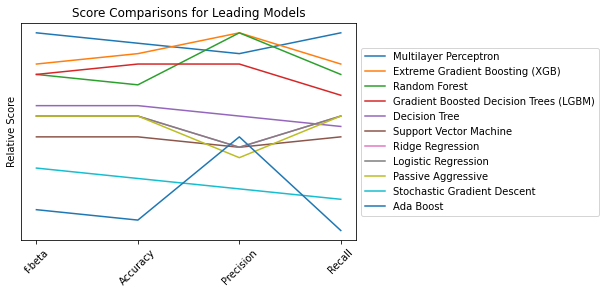

In [150]:
# Plot the relative scores of each model against each other for comparison

x = np.arange(4)
xlabels = [['f-beta'],
           ['Accuracy'],
           ['Precision'],
           ['Recall']]
 
fig=plt.figure()
ax=fig.add_subplot(111)
 
tv = np.transpose(tableValues)

for v in tv:
    ax.plot(x, [v[1], v[2], v[3], v[4]], label = v[0])

plt.xticks(x, [l[0] for l in xlabels], rotation = 45)
plt.ylabel('Relative Score')
axes = plt.gca()
ax.yaxis.set_major_locator(plt.NullLocator())
plt.gca().invert_yaxis()
plt.title('Score Comparisons for Leading Models')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()